In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import math
import ef1
ir=ef1.get_returns()
ier=ef1.annualised_returns(ir["2016":"2020"],252)
cov=ir["2016":"2020"].cov()*252

n_points=250

df2=pd.DataFrame(data={
    "Returns":ier.values,
    "Volatility":ir["2016":"2020"].std().values*(252**0.5)},
    index= ier.index.values
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='Volatility'>

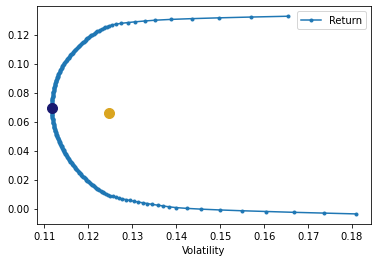

In [38]:
df1 = ef1.efficient_frontier(n_points, ier,cov,show_cml=True, riskfree_rate=0.01, show_ew=True, show_gmv=True)
ef1.plot_efficient_frontier(n_points,ier,cov,df2,style='.-', legend=True, show_cml=False, riskfree_rate=0.0, show_ew=True, show_gmv=True)

In [39]:
with pd.ExcelWriter('ef_output.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')

In [36]:
df2.iloc[:,1:2]**2

,Volatility
US(S&P),0.035680
Japan,0.033970
France,0.038414
Germany,0.040147
UK,0.029295
South Korea,0.026453
India,0.031306
China,0.032739
Russia,0.068620
Indonesia,0.045142


In [33]:
cov

,US(S&P),Japan,France,Germany,UK,South Korea,India,China,Russia,Indonesia,Vietnam
US(S&P),0.035680,0.007238,0.022960,0.023185,0.019516,0.008201,0.010483,0.006189,0.018555,0.009112,0.005951
Japan,0.007238,0.033970,0.013328,0.012873,0.010284,0.015307,0.010279,0.009535,0.010224,0.008461,0.009170
France,0.022960,0.013328,0.038414,0.036798,0.029315,0.014133,0.016933,0.007744,0.030142,0.010820,0.008029
Germany,0.023185,0.012873,0.036798,0.040147,0.028661,0.014086,0.016286,0.008528,0.029599,0.010006,0.007358
UK,0.019516,0.010284,0.029315,0.028661,0.029295,0.011695,0.013855,0.007068,0.025924,0.008721,0.006792
South Korea,0.008201,0.015307,0.014133,0.014086,0.011695,0.026453,0.014691,0.011536,0.012894,0.013834,0.009240
India,0.010483,0.010279,0.016933,0.016286,0.013855,0.014691,0.031306,0.008977,0.016356,0.015743,0.008208
China,0.006189,0.009535,0.007744,0.008528,0.007068,0.011536,0.008977,0.032739,0.008858,0.007932,0.008283
Russia,0.018555,0.010224,0.030142,0.029599,0.025924,0.012894,0.016356,0.008858,0.068620,0.010897,0.006157
Indonesia,0.009112,0.008461,0.010820,0.010006,0.008721,0.013834,0.015743,0.007932,0.010897,0.045142,0.008800


In [35]:
ir["2016":"2020"].std().values

array([ 755.64212812,  737.30219345,  784.04984901,  801.54162881,
        684.70099166,  650.63084195,  707.8086295 ,  723.8253419 ,
       1047.91641858,  849.94578496,  661.55697238])